<a href="https://colab.research.google.com/github/jadisiii/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Ray_Arbizu_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [1]:
import pandas as pd 
cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))


In [2]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


Check for missing/null values in the three dataframes

In [3]:
# Your Work Here

# Cell phone null data
cell_phones.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [4]:
# Population null data
population.isnull().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [5]:
# Geo Country Codes null data
geo_country_codes.isnull().sum()

geo                         0
g77_and_oecd_countries     14
income_3groups             55
income_groups              55
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  32
main_religion_2008         57
country                     0
un_state                    0
unicef_region              78
unicode_region_subtag      25
world_4region               2
world_6region              13
dtype: int64

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

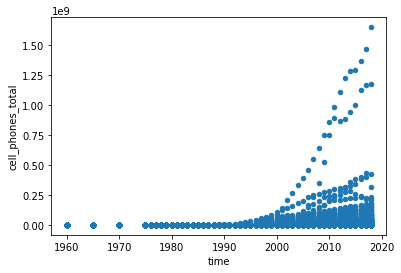

In [6]:
# Your Work Here
# Cell Phone Datafram scatter plot
#print(cell_phones.tail(2))
cell_phones.plot.scatter(x='time', y='cell_phones_total');

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [7]:
# Your Work Here
print(cell_phones.head(2))
print(population.head(2))

   geo  time  cell_phones_total
0  abw  1960                0.0
1  abw  1965                0.0
   geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000


In [8]:
# Joining Cell Phone and Population data on 'geo' and 'time' using merge
cell_pop = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])
#print(cell_pop.shape)
cell_pop

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996967
1,afg,1965,0.0,9956318
2,afg,1970,0.0,11173654
3,afg,1975,0.0,12689164
4,afg,1976,0.0,12943093
...,...,...,...,...
8781,zwe,2014,11798652.0,13586710
8782,zwe,2015,12757410.0,13814642
8783,zwe,2016,12878926.0,14030338
8784,zwe,2017,14092104.0,14236599


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [9]:
# Your Work Here
geo_country_codes.head(3)

,geo,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,False,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,12.5,-69.96667,christian,Aruba,False,NaN,AW,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.00000,muslim,Afghanistan,True,sa,AF,asia,south_asia


In [10]:
geo_country_df = geo_country_codes[['geo', 'country']]
geo_country_df

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla
...,...,...
268,yem_south,South Yemen (former)
269,yug,Yugoslavia
270,zaf,South Africa
271,zmb,Zambia


In [11]:
cell_pop_geo = pd.merge(cell_pop, geo_country_df, how='inner', on='geo')
cell_pop_geo

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996967,Afghanistan
1,afg,1965,0.0,9956318,Afghanistan
2,afg,1970,0.0,11173654,Afghanistan
3,afg,1975,0.0,12689164,Afghanistan
4,afg,1976,0.0,12943093,Afghanistan
...,...,...,...,...,...
8781,zwe,2014,11798652.0,13586710,Zimbabwe
8782,zwe,2015,12757410.0,13814642,Zimbabwe
8783,zwe,2016,12878926.0,14030338,Zimbabwe
8784,zwe,2017,14092104.0,14236599,Zimbabwe


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [12]:
# Your Work Here 
cell_pop_geo['cell_per_person'] = cell_pop_geo['cell_phones_total'] / cell_pop_geo['population_total']
cell_pop_geo

,geo,time,cell_phones_total,population_total,country,cell_per_person
0,afg,1960,0.0,8996967,Afghanistan,0.000000
1,afg,1965,0.0,9956318,Afghanistan,0.000000
2,afg,1970,0.0,11173654,Afghanistan,0.000000
3,afg,1975,0.0,12689164,Afghanistan,0.000000
4,afg,1976,0.0,12943093,Afghanistan,0.000000
...,...,...,...,...,...,...
8781,zwe,2014,11798652.0,13586710,Zimbabwe,0.868397
8782,zwe,2015,12757410.0,13814642,Zimbabwe,0.923470
8783,zwe,2016,12878926.0,14030338,Zimbabwe,0.917934
8784,zwe,2017,14092104.0,14236599,Zimbabwe,0.989850


In [13]:
check = cell_pop_geo['country'] == 'United States'
cell_pop_geo[check]

,geo,time,cell_phones_total,population_total,country,cell_per_person
8277,usa,1960,0.0,186720570,United States,0.000000
8278,usa,1965,0.0,199733679,United States,0.000000
8279,usa,1970,0.0,209513340,United States,0.000000
8280,usa,1975,0.0,219081250,United States,0.000000
8281,usa,1976,0.0,221086427,United States,0.000000
8282,usa,1977,0.0,223135659,United States,0.000000
8283,usa,1978,0.0,225223307,United States,0.000000
8284,usa,1979,0.0,227339321,United States,0.000000
8285,usa,1980,0.0,229476360,United States,0.000000
8286,usa,1984,91600.0,238256849,United States,0.000384


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [96]:
# Your Work Here
cell_pop_geo.describe(include='all')

,geo,time,cell_phones_total,population_total,country,cell_per_person
count,8786,8786.000000,8.786000e+03,8.786000e+03,8786,8786.000000
unique,195,NaN,NaN,NaN,195,NaN
top,bhr,NaN,NaN,NaN,Turkey,NaN
freq,47,NaN,NaN,NaN,47,NaN
mean,NaN,1994.721603,9.701331e+06,3.002185e+07,NaN,0.298025
std,NaN,14.525220,5.968296e+07,1.172833e+08,NaN,0.468332
min,NaN,1960.000000,0.000000e+00,4.377000e+03,NaN,0.000000
25%,NaN,1983.000000,0.000000e+00,1.474928e+06,NaN,0.000000
50%,NaN,1995.000000,8.500000e+03,5.816554e+06,NaN,0.002346
75%,NaN,2007.000000,2.028511e+06,1.823047e+07,NaN,0.532728


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [15]:
cell_pop_geo['time'].dtypes

dtype('int64')

In [16]:
# Your Work Here
country_totals_2017 = cell_pop_geo.loc[cell_pop_geo['time'] == 2017, ['country', 'cell_phones_total']]

In [17]:
country_totals_2017 = country_totals_2017.sort_values('cell_phones_total', ascending=False)
country_totals_2017.head(5)

,country,cell_phones_total
1530,China,1.469882e+09
3674,India,1.168902e+09
3627,Indonesia,4.351936e+08
8319,United States,4.000000e+08
6783,Russia,2.272997e+08


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


### Part 1 — Recreate this explanatory visualization:



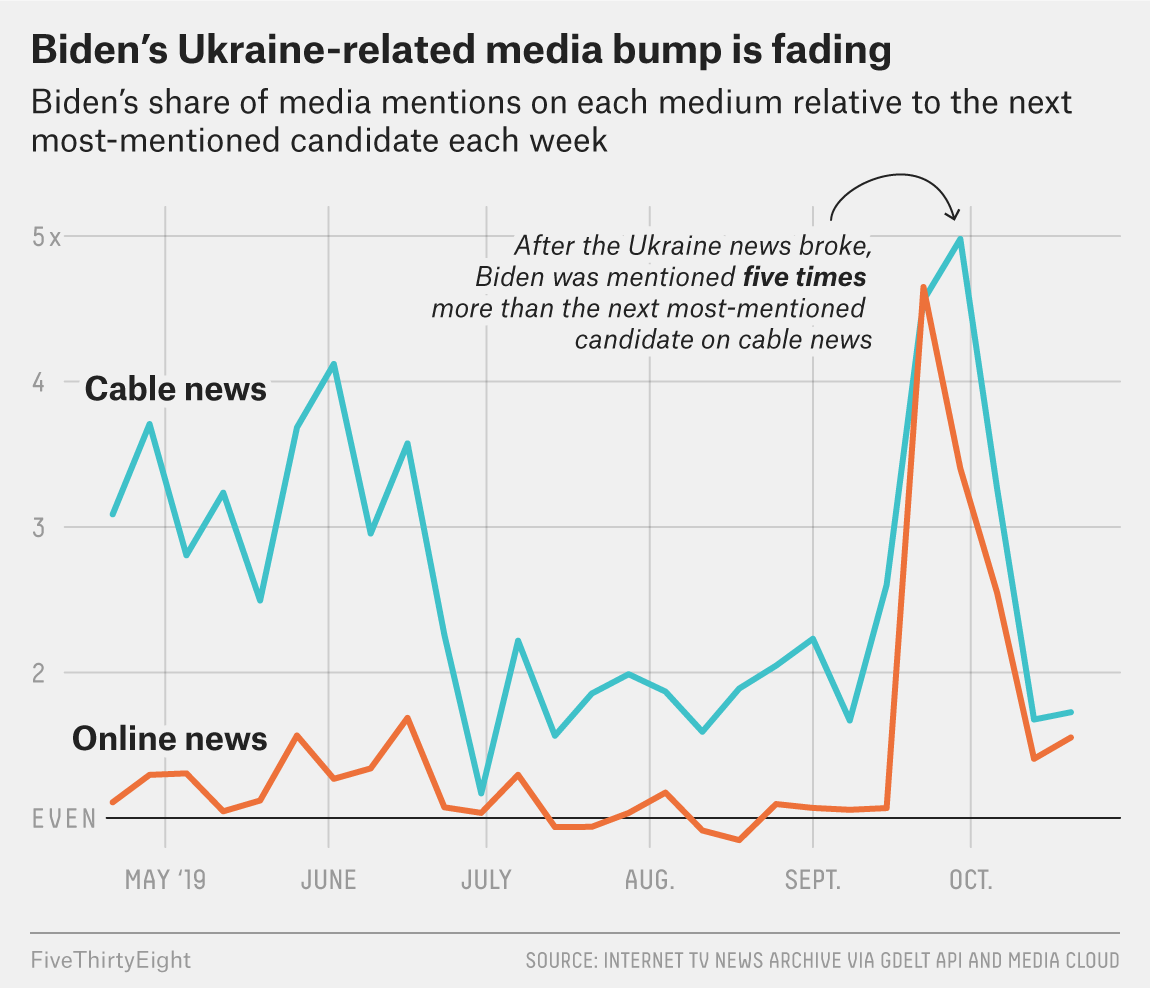

In [19]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

In [20]:
# Your Work Here
#for x in [1,2,3]:
#  data_for_graph[data_for_graph['date']==x].groupby('biden_cable_multiple')['biden_online_multiple'].mean().plot(figsize=(12,4));
#data_for_graph.head()

In [21]:
# sns.set(style="whitegrid")
#sns.lineplot(data=data_for_graph, palette='tab10', linewidth=2.5, dashes=False,)

biden_cable = data_for_graph['biden_cable_multiple']
biden_online = data_for_graph['biden_online_multiple']

In [22]:
df = data_for_graph

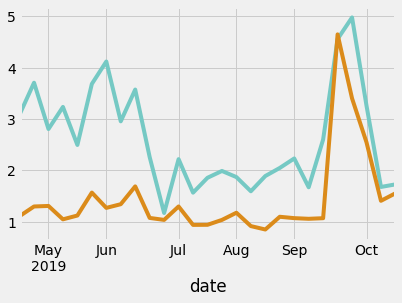

In [72]:
# Setting the style
#fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
#ax = fig.add_subplot(111)
#fig, ax = plt.subplots()
#data_for_graph.plot(kind='line')
# Setting the title and subtitle 
#t = ("Biden's share of media mentions on each meduim relative to the" 
#     "next most-mentioned candidate each week")

df.plot(kind='line', color=["#75c9c4","#db8b1a"], legend=False)
#ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
#             fontsize=12, 
#             x=.35, 
#             y=1.1,
#             fontweight='bold')
#ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);
#plt.suptitle("Biden's Ukraine-related media bump is fading", fontsize=16, fontweight='bold', x=.38, y=1.1) 
#plt.text(0, 0, "Biden's share of media mentions on each meduim relative to the", fontsize=14) 

plt.show()

In [106]:
fig = plt.figure(figsize=(9, 6))
plt.style.use('fivethirtyeight')
fig.suptitle("Biden's Ukraine-related media bump is fading", fontsize=18, fontweight='bold', x=.40, y=1.1)

fig, ax = plt.subplots()
#fig.subplots_adjust(top=1)

ax.text(-.25, 5.9, "Biden's share of media mentions on each meduim relative to the", fontsize=14,)
ax.text(-.25, 5.7, "next most-mentioned candidate each week", fontsize=14,)

ax.text(.25, 3.8, 'Cable')
ax.text(.25, 1.5, 'Online')

ax.plot(df.index, df.biden_cable_multiple, color="#75c9c4")
ax.plot(df.index, df.biden_online_multiple, color="#db8b1a")

plt.show()

<Figure size 648x432 with 0 Axes>

ValueError: ignored

<Figure size 432x288 with 1 Axes>

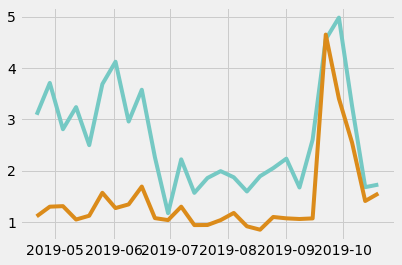

<Figure size 648x432 with 0 Axes>

In [108]:
fig, ax = plt.subplots()

fig = plt.figure(figsize=(9, 6))
# plt.style.use('fivethirtyeight')
# fig.suptitle("Biden's Ukraine-related media bump is fading", fontsize=18, fontweight='bold', x=.40, y=1.1)

fig.suptitle("Biden's Ukraine-related media bump is fading", fontsize=18, fontweight='bold', x=.40, y=1.1)
ax.plot(df.index, df.biden_cable_multiple, color="#75c9c4")
ax.plot(df.index, df.biden_online_multiple, color="#db8b1a")
plt.show()

In [99]:
df.index

DatetimeIndex(['2019-04-21', '2019-04-28', '2019-05-05', '2019-05-12',
               '2019-05-19', '2019-05-26', '2019-06-02', '2019-06-09',
               '2019-06-16', '2019-06-23', '2019-06-30', '2019-07-07',
               '2019-07-14', '2019-07-21', '2019-07-28', '2019-08-04',
               '2019-08-11', '2019-08-18', '2019-08-25', '2019-09-01',
               '2019-09-08', '2019-09-15', '2019-09-22', '2019-09-29',
               '2019-10-06', '2019-10-13', '2019-10-20'],
              dtype='datetime64[ns]', name='date', freq=None)

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.


In [95]:
# Data Wrangling Section 1
# Filter the cell_phones dataframe to only include information about the USA and China and then remake the scatterplot.
usa_phones = cell_pop_geo.loc[cell_pop_geo['geo']== 'usa']
china_phones = cell_pop_geo.loc[cell_pop_geo['country']== 'China']

usa_china = pd.merge(usa_phones, china_phones, how='inner', on='geo')
usa_china.head()

,geo,time_x,cell_phones_total_x,population_total_x,country_x,cell_per_person_x,time_y,cell_phones_total_y,population_total_y,country_y,cell_per_person_y
